In [ ]:
import gzip
from tqdm.notebook import tqdm
propFileDict = {}
fileLineCount = 1149471184
with gzip.open('../../gdrive-kgtk-dump-2020-12-07/claims.tsv.gz','r') as fin: 
    headerLine = next(fin).decode("utf-8")
#     tstCount = 0
    for line in tqdm(fin, total = fileLineCount):
        line = line.decode("utf-8")
        lineP = line.rstrip().split("\t")
        if "external-id" in lineP[-1]:
            continue
        prop = lineP[2]
        print('got line', lineP)
        if prop not in propFileDict:
            propFileDict[prop] = open("../../propertiesSplit/claims."+str(prop)+".tsv","w")
            propFileDict[prop].write(headerLine)
        propFileDict[prop].write(line)
#         tstCount += 1
#         if tstCount == 10:
#             break
    for file1 in propFileDict.values():
        file1.close()

In [2]:
!kgtk --debug query -i ../../propertiesSplit/claims.P996.tsv \
    ../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), c: (rLabel)-[:P2308]->(parent), d: (node1)-[]->(par), c: (eLabel)-[:P2303]->(eNode)" \
    --where 'nodeProp.label = rLabel and (par = parent or (rLabel = eLabel and node1 = eNode))' \
    --return 'nodeProp.id, node1, nodeProp.label, node2, max(parent) as `node1;ancestor`' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.all.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 19:33:50 sqlstore]: IMPORT graph directly into table graph_11 from /data/wd-correctness/propertiesSplit/claims.P996.tsv ...
[2021-03-12 19:33:51 sqlstore]: IMPORT graph directly into table graph_12 from /data/wd-correctness/wikidata-20210215/derived.isastar.tsv.gz ...
^C


In [4]:
!kgtk --debug query -i ../../propertiesSplit/claims.P996.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q1238720","Q3331189","Q47461344"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P996.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 22:33:26 query]: SQL Translation:
---------------------------------------------
  SELECT graph_11_c1."id", graph_11_c1."node1", graph_11_c1."label", graph_11_c1."node2"
     FROM graph_11 AS graph_11_c1, graph_14 AS graph_14_c2
     WHERE graph_11_c1."node1"=graph_14_c2."node1"
     AND (graph_14_c2."node2" IN (?, ?, ?))
  PARAS: ['Q1238720', 'Q3331189', 'Q47461344']
---------------------------------------------


In [7]:
!wc -l ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv

81289 ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv


In [8]:
!kgtk --debug query -i ../../propertiesSplit/claims.P991.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q40231"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P991.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.incorrect.tsv

[2021-03-12 22:49:54 sqlstore]: IMPORT graph directly into table graph_15 from /data/wd-correctness/propertiesSplit/claims.P991.tsv ...
[2021-03-12 22:49:54 query]: SQL Translation:
---------------------------------------------
  SELECT graph_15_c1."id", graph_15_c1."node1", graph_15_c1."label", graph_15_c1."node2"
     FROM graph_15 AS graph_15_c1, graph_5 AS graph_5_c2
     WHERE graph_15_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q40231']
---------------------------------------------
[2021-03-12 22:49:55 sqlstore]: CREATE INDEX on table graph_15 column node1 ...
[2021-03-12 22:49:55 sqlstore]: ANALYZE INDEX on table graph_15 column node1 ...


In [9]:
!kgtk --debug query -i ../../propertiesSplit/claims.P965.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q6023295"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P965.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.incorrect.tsv

[2021-03-12 23:54:56 sqlstore]: IMPORT graph directly into table graph_16 from /data/wd-correctness/propertiesSplit/claims.P965.tsv ...
[2021-03-12 23:54:56 query]: SQL Translation:
---------------------------------------------
  SELECT graph_16_c1."id", graph_5_c2."node1", graph_16_c1."label", graph_16_c1."node2"
     FROM graph_16 AS graph_16_c1, graph_5 AS graph_5_c2
     WHERE graph_16_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q6023295']
---------------------------------------------
[2021-03-12 23:54:56 sqlstore]: CREATE INDEX on table graph_16 column node1 ...
[2021-03-12 23:54:56 sqlstore]: ANALYZE INDEX on table graph_16 column node1 ...


# Generate Queries

## Type Constraint

### Understand Constraints File

In [5]:
import pandas as pd
df = pd.read_csv('../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv',sep='\t')

In [6]:
df1 = df.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [7]:
df1.head()

node1  label                                              node2
0  P1001  P2308  [Q102496, Q105985, Q1140371, Q1151067, Q119768...
1  P1001  P2309                                        [Q30208840]
2  P1002  P2308                                          [Q630010]
3  P1002  P2309                                        [Q21514624]
4  P1004  P2308          [Q2221906, Q23413, Q3947, Q41176, Q88291]

In [8]:
df1[df1['node1'] == 'P105']

node1  label        node2
69  P105  P2308     [Q16521]
70  P105  P2309  [Q21503252]
71  P105  P2316  [Q21502408]

### Query Generator

In [51]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1
fOP = None

for prop in tqdm(df1.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
        relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
        type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values
#         print(type1)

        parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
        exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'typeConstraint_Final2'
        shellFileSuffix = 'typeConstraintValidator_xverify'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node1)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const113_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;")

        cnt += 1
    except:
        print("Something failed for prop:",prop)

if fOP:
    fOP.close()

  0%|          | 0/4810 [00:00<?, ?it/s]

Something failed for prop: P1249
Something failed for prop: P6790


In [52]:
cnt

1456

In [53]:
# import os
# for i in range(1,14):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/typeConstraintValidator_xverify"+str(i)+".sh")
    

### Analyze Violations

In [37]:
import pandas as pd
import os
from tqdm.notebook import tqdm

typeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

propList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    typeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}}
    filePath = "../../allConstraintsAnalysis/typeConstraint_Final2/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        propList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        typeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        

0it [00:00, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2560 [00:00<?, ?it/s]

In [38]:
# countLines("../../allConstraintsAnalysis/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [39]:
recordCount = 0
for elem in typeConstViolations.keys():
    for key1 in typeConstViolations[elem].keys():
        recordCount += typeConstViolations[elem][key1]['correct'] + typeConstViolations[elem][key1]['incorrect']
print(f"{len(propList)} properties processed for type constraint for {recordCount} statements")

1456 properties processed for type constraint for 510762035 statements


In [40]:
import pandas as pd
typeConstDF = pd.DataFrame(violations).T

In [41]:
typeConstDF['violation_ratio'] = typeConstDF.apply(lambda p: p.incorrect / (p.correct + p.incorrect) if p.correct != 0 else p.incorrect/100, axis=1)

In [42]:
typeConstDF.head()

correct incorrect                                              paths  \
P621      354         5  [../../allConstraintsAnalysis/typeConstraint_F...   
P3022    3743         0  [../../allConstraintsAnalysis/typeConstraint_F...   
P543       79         0  [../../allConstraintsAnalysis/typeConstraint_F...   
P720      403         0  [../../allConstraintsAnalysis/typeConstraint_F...   
P944      581         0  [../../allConstraintsAnalysis/typeConstraint_F...   

       violation_ratio  
P621          0.013928  
P3022         0.000000  
P543          0.000000  
P720          0.000000  
P944          0.000000

In [43]:
typeConstDF.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P8138       0       461  [../../allConstraintsAnalysis/typeConstraint_F...   
P1111       7     46320  [../../allConstraintsAnalysis/typeConstraint_F...   
P7535       1       208  [../../allConstraintsAnalysis/typeConstraint_F...   
P6753       3       425  [../../allConstraintsAnalysis/typeConstraint_F...   
P768      137     15139  [../../allConstraintsAnalysis/typeConstraint_F...   
P7290       2       149  [../../allConstraintsAnalysis/typeConstraint_F...   
P1595      68      4262  [../../allConstraintsAnalysis/typeConstraint_F...   
P7080       4       208  [../../allConstraintsAnalysis/typeConstraint_F...   
P7045       1        42  [../../allConstraintsAnalysis/typeConstraint_F...   
P207        6       196  [../../allConstraintsAnalysis/typeConstraint_F...   
P2228       2        59  [../../allConstraintsAnalysis/typeConstraint_F...   
P4945     312      7495  [../../allConstraintsAnalysis/typeConstraint_F...   
P2964       4        61  [../../allConstraintsAnalysis/typeConstraint_F...   
P2715      11       151  [../../allConstraintsAnalysis/typeConstraint_F...   
P878       12       154  [../../allConstraintsAnalysis/typeConstraint_F...   

       violation_ratio  
P8138         4.610000  
P1111         0.999849  
P7535         0.995215  
P6753         0.992991  
P768          0.991032  
P7290         0.986755  
P1595         0.984296  
P7080         0.981132  
P7045         0.976744  
P207          0.970297  
P2228         0.967213  
P4945         0.960036  
P2964         0.938462  
P2715         0.932099  
P878          0.927711

In [44]:
list(typeConstDF.loc['P4945'].paths)

['../../allConstraintsAnalysis/typeConstraint_Final2/normal/claims.type-constraints.instanceOf.P4945.correct.tsv',
 '../../allConstraintsAnalysis/typeConstraint_Final2/normal/claims.type-constraints.instanceOf.P4945.incorrect.tsv']

In [45]:
typeConstDF['violation_ratio'].describe()

count    1456.000000
mean        0.080051
std         0.215349
min         0.000000
25%         0.000594
50%         0.008160
75%         0.048333
max         4.610000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Type Constraint Violation Ratios')

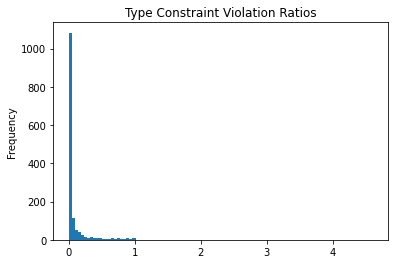

In [46]:
typeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Type Constraint Violation Ratios (<=0.05)')

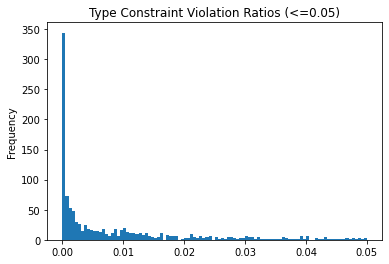

In [47]:
typeConstDF[typeConstDF['violation_ratio'] <= 0.05].violation_ratio.plot.hist(bins=100).set_title("Type Constraint Violation Ratios (<=0.05)")

In [48]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(typeConstDF['violation_ratio'] >= 5.286054)}/{len(typeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/1456


In [49]:
# typeConstDF.sort_values(by=['incorrect'],ascending=False).head(5).paths.values

In [50]:
# !cat ../../allConstraintsAnalysis/typeConstraint/normal/claims.type-constraints.instanceOf.P953.incorrect.tsv

In [52]:
for key1 in typeConstViolations.keys():
    typeConstViolations[key1]['correct'] = typeConstViolations[key1]['instanceOf']['correct'] + typeConstViolations[key1]['subclass']['correct'] + typeConstViolations[key1]['instanceOfOrSubclass']['correct']
    typeConstViolations[key1]['incorrect'] = typeConstViolations[key1]['instanceOf']['incorrect'] + typeConstViolations[key1]['subclass']['incorrect'] + typeConstViolations[key1]['instanceOfOrSubclass']['incorrect']
    typeConstViolations[key1]['VR'] = typeConstViolations[key1]['incorrect'] / (typeConstViolations[key1]['correct'] + typeConstViolations[key1]['incorrect'])
        

In [53]:
typeConstViolations

{'mandatory': {'instanceOf': {'correct': 44768778, 'incorrect': 35027},
  'subclass': {'correct': 1966, 'incorrect': 30},
  'instanceOfOrSubclass': {'correct': 221394, 'incorrect': 204},
  'correct': 44992138,
  'incorrect': 35261,
  'VR': 0.0007831009736982587},
 'suggestion': {'instanceOf': {'correct': 61486, 'incorrect': 18368},
  'subclass': {'correct': 0, 'incorrect': 0},
  'instanceOfOrSubclass': {'correct': 23314, 'incorrect': 2939},
  'correct': 84800,
  'incorrect': 21307,
  'VR': 0.200806732826298},
 'normal': {'instanceOf': {'correct': 398100301, 'incorrect': 797888},
  'subclass': {'correct': 96605, 'incorrect': 9442},
  'instanceOfOrSubclass': {'correct': 66358710, 'incorrect': 265583},
  'correct': 464555616,
  'incorrect': 1072913,
  'VR': 0.0023042252207016293}}

In [18]:
typeConstDF['total'] = typeConstDF['correct'] + typeConstDF['incorrect']
typeConstDF.sort_values(by=['total'],ascending=False).head()

correct incorrect                                              paths  \
P2093  134805157      6527  [../../allConstraintsAnalysis/typeConstraint_F...   
P1476   39856876     47204  [../../allConstraintsAnalysis/typeConstraint_F...   
P577    38855314     33977  [../../allConstraintsAnalysis/typeConstraint_F...   
P1433   36723283     12050  [../../allConstraintsAnalysis/typeConstraint_F...   
P1215   33099195     24104  [../../allConstraintsAnalysis/typeConstraint_F...   

       violation_ratio      total  
P2093         0.000048  134811684  
P1476         0.001183   39904080  
P577          0.000874   38889291  
P1433         0.000328   36735333  
P1215         0.000728   33123299

### Find out time required

In [19]:
# from tqdm.notebook import tqdm
# import os.path

# cnt = 0
# fCnt = 1
# for prop in tqdm(df1.node1.unique()):
#     try:
#         if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
#             continue
#         relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
#         type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values

#         parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
#         exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values

# #         print(prop, relation, type1, parents, exceptions)

#         if relation == "Q21503252":
#             parentFile = "P31P279star"
#             parentTitle = 'instanceOf'
#         elif relation == "Q21514624":
#             parentFile = "P279star"
#             parentTitle = 'subclass'
#         else:
#             parentFile = "isastar"
#             parentTitle = 'instanceOfOrSubclass'

#         if len(type1) != 0 and type1[0][0] == "Q21502408":
#             typeVal = "mandatory"
#         elif len(type1) != 0 and type1[0][0] == "Q62026391":
#             typeVal = "suggestion"
#         else:
#             typeVal = "normal"

#         if len(exceptions):
#             exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
#         else:
#             exceptionPart = ""
        
#         if cnt % 100 == 0:
#             fOP = open("../../propertiesSplit/checkViolations/TimedTypeConstraintValidator" + str(fCnt) + ".sh","w")
#             fCnt += 1
        
#         fOP.write("{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
#         ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
#         --match 'm: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)' \
#         --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
#         --return 'nodeProp.id, node1, nodeProp.label, node2' \
#         -o ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --graph-cache ~/sqlite3_caches/const2123_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/TimedTypeConstraint_TimedTypeConstraintValidator" + str(fCnt) + ".txt ; \
#          kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
#         --filter-on ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --filter-mode NONE \
#         --input-keys node1 label \
#         --filter-keys node1 label \
#         -o ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv\n")

#         cnt += 1
#     except:
#         print("Something failed for prop:",prop)
    

In [21]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("typeConstraintValidator_xverify"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/231 [00:00<?, ?it/s]

In [22]:
print(pd.Series(times).describe())

count    1456.000000
mean      232.581249
std       540.282097
min         2.284000
25%        25.882500
50%        64.563500
75%       218.426750
max      6882.947000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for type constraint checks')

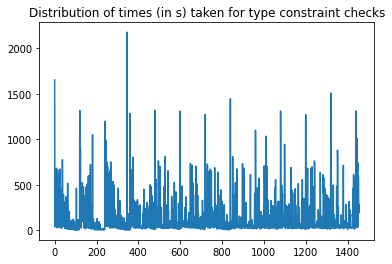

In [95]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for type constraint checks")

## Value Type Constraint

### Understand Constraints File

In [99]:
import pandas as pd
dfValueType = pd.read_csv('../../constraintsOP/valuetypeConstraint/claims.type-constraints_all1.tsv',sep='\t')

In [100]:
dfValueType = dfValueType.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [101]:
dfValueType.head()

node1  label                                              node2
0  P1000  P2308                                         [Q1241356]
1  P1000  P2309                                        [Q30208840]
2  P1001  P2308  [Q20926517, Q2881272, Q2882257, Q3624078, Q389...
3  P1001  P2309                                        [Q30208840]
4  P1002  P2308                                         [Q2576663]

In [102]:
dfValueType['label'].unique()

array(['P2308', 'P2309', 'P2303', 'P2316', 'P6607', 'P2304'], dtype=object)

In [103]:
dfValueType[dfValueType['label'] == '2316']

Empty DataFrame
Columns: [node1, label, node2]
Index: []

In [104]:
dfValueType[dfValueType['node1'] == 'P1659']

node1  label        node2
330  P1659  P2308  [Q18616576]
331  P1659  P2309  [Q21503252]
332  P1659  P2316  [Q21502408]

In [105]:
dfValueType[dfValueType.node1 == 'P991']

node1  label           node2
2031  P991  P2308  [Q5, Q7210356]
2032  P991  P2309     [Q21503252]

### Query Generator

In [106]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1
for prop in tqdm(dfValueType.node1.unique()):
    try:
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
        relation = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2309')].node2.values[0][0]
        type1 = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2316')].node2.values
#         print(type1)

        parents = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2308')].node2.values[0]
        exceptions = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node2 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'valuetypeConstraint_Final3'
        shellFileSuffix = 'valueTypeConstraintValidator_xverify2'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node2)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const111_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n")
        
        cnt += 1
    except:
        print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/932 [00:00<?, ?it/s]

Something failed for prop: P1389


In [107]:
cnt

897

In [16]:
# import os
# for i in range(1,9):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/valueTypeConstraintValidator_xverify2"+str(i)+".sh")
    

### Analyze Violations

In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm

valueTypeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

valueTypePropList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    valueTypeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}}
    filePath = "../../allConstraintsAnalysis/valuetypeConstraint_Final4/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        valueTypePropList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        valueTypeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        

0it [00:00, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1572 [00:00<?, ?it/s]

In [2]:
# countLines("../../allConstraintsAnalysis/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [3]:
recordCount = 0
for elem in valueTypeConstViolations.keys():
    for key1 in valueTypeConstViolations[elem].keys():
        recordCount += valueTypeConstViolations[elem][key1]['correct'] + valueTypeConstViolations[elem][key1]['incorrect']
print(f"{len(valueTypePropList)} properties processed for value type constraint for {recordCount} statements")

897 properties processed for value type constraint for 181823950 statements


In [4]:
import pandas as pd
valTypeConstDF = pd.DataFrame(violations).T

In [5]:
valTypeConstDF['violation_ratio'] = valTypeConstDF.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)

In [6]:
valTypeConstDF.head()

correct incorrect                                              paths  \
P2302   42211         0  [../../allConstraintsAnalysis/valuetypeConstra...   
P3092    4620         1  [../../allConstraintsAnalysis/valuetypeConstra...   
P3096   11150         2  [../../allConstraintsAnalysis/valuetypeConstra...   
P3156     348         0  [../../allConstraintsAnalysis/valuetypeConstra...   
P87      4766         3  [../../allConstraintsAnalysis/valuetypeConstra...   

       violation_ratio  
P2302         0.000000  
P3092         0.000216  
P3096         0.000179  
P3156         0.000000  
P87           0.000629

In [7]:
valTypeConstDF.sort_values(by=['violation_ratio','incorrect'],ascending=False).head(15)

correct incorrect                                              paths  \
P5008       0    331026  [../../allConstraintsAnalysis/valuetypeConstra...   
P6104       0      9764  [../../allConstraintsAnalysis/valuetypeConstra...   
P2545       0      1369  [../../allConstraintsAnalysis/valuetypeConstra...   
P2668       0       168  [../../allConstraintsAnalysis/valuetypeConstra...   
P7374       0        32  [../../allConstraintsAnalysis/valuetypeConstra...   
P2839       0        14  [../../allConstraintsAnalysis/valuetypeConstra...   
P3028       0        13  [../../allConstraintsAnalysis/valuetypeConstra...   
P3027       0        12  [../../allConstraintsAnalysis/valuetypeConstra...   
P2127       0        11  [../../allConstraintsAnalysis/valuetypeConstra...   
P538        0        10  [../../allConstraintsAnalysis/valuetypeConstra...   
P143        0         7  [../../allConstraintsAnalysis/valuetypeConstra...   
P4425       0         6  [../../allConstraintsAnalysis/valuetypeConstra...   
P6191       0         5  [../../allConstraintsAnalysis/valuetypeConstra...   
P6533       0         5  [../../allConstraintsAnalysis/valuetypeConstra...   
P6534       0         5  [../../allConstraintsAnalysis/valuetypeConstra...   

       violation_ratio  
P5008              1.0  
P6104              1.0  
P2545              1.0  
P2668              1.0  
P7374              1.0  
P2839              1.0  
P3028              1.0  
P3027              1.0  
P2127              1.0  
P538               1.0  
P143               1.0  
P4425              1.0  
P6191              1.0  
P6533              1.0  
P6534              1.0

In [8]:
valTypeConstDF['violation_ratio'].describe()

count    897.000000
mean       0.083622
std        0.205759
min        0.000000
25%        0.000451
50%        0.006186
75%        0.042042
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios')

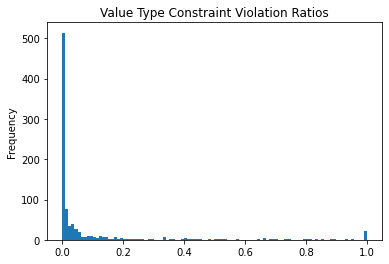

In [9]:
valTypeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios (<=0.04)')

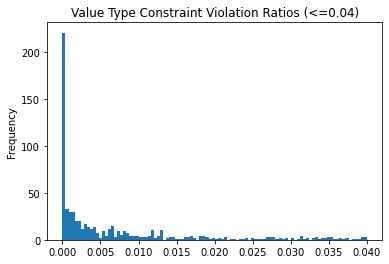

In [10]:
valTypeConstDF[valTypeConstDF['violation_ratio'] <= 0.04].violation_ratio.plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios (<=0.04)")

In [11]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(valTypeConstDF['violation_ratio'] >= 3.950680)}/{len(valTypeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/897


In [12]:
# valTypeConstDF.sort_values(by=['violation_ratio'],ascending=False).head().paths.values

In [13]:
# !head ../../allConstraintsAnalysis/typeConstraint/normal/claims.type-constraints.instanceOf.P7535.incorrect.tsv

In [14]:
!cat ../../allConstraintsAnalysis/valuetypeConstraint_Final2/mandatory/claims.type-constraints.instanceOf.P1659.correct.tsv

id	node1	label	node2
P10-P1659-P1651-c4068028-0	P10	P1659	P1651
P10-P1659-P18-5e4b9c4f-0	P10	P1659	P18
P10-P1659-P4238-d21d1ac0-0	P10	P1659	P4238
P10-P1659-P51-86aca4c5-0	P10	P1659	P51
P1001-P1659-P2541-cb89fbeb-0	P1001	P1659	P2541
P1004-P1659-P5432-9ecaf7df-0	P1004	P1659	P5432
P1004-P1659-P982-c9002056-0	P1004	P1659	P982
P1005-P1659-P5691-e6c3a40d-0	P1005	P1659	P5691
P1005-P1659-P6373-a03b5bb9-0	P1005	P1659	P6373
P101-P1659-P106-1d5ab3b0-0	P101	P1659	P106
P101-P1659-P2579-44ca0fcf-0	P101	P1659	P2579
P101-P1659-P2650-0a31a01e-0	P101	P1659	P2650
P101-P1659-P3095-28ef062b-0	P101	P1659	P3095
P101-P1659-P39-2f22f928-0	P101	P1659	P39
P101-P1659-P425-a6537cf8-0	P101	P1659	P425
P101-P1659-P452-bcfe00b3-0	P101	P1659	P452
P101-P1659-P4968-900cf571-0	P101	P1659	P4968
P101-P1659-P7163-426c37f1-0	P101	P1659	P7163
P1011-P1659-P1012-3074edf6-0	P1011	P1659	P1012
P1011-P1659-P3113-cb6695a6-0	P1011	P1659	P3113
P1011-P1659-P6477-23867d65-0	P1011	P1659	P6477
P1012-P1659-P1011-ef2e81fa-0	P1012	P1659	P1011

P1984-P1659-P1982-060afda6-0	P1984	P1659	P1982
P1984-P1659-P1983-a2b950bf-0	P1984	P1659	P1983
P1984-P1659-P1985-579e3d72-0	P1984	P1659	P1985
P1985-P1659-P1982-1705e693-0	P1985	P1659	P1982
P1985-P1659-P1983-59e594b7-0	P1985	P1659	P1983
P1985-P1659-P1984-910cb61d-0	P1985	P1659	P1984
P1986-P1659-P3365-7c82a671-0	P1986	P1659	P3365
P1986-P1659-P4223-d2ecfe46-0	P1986	P1659	P4223
P1986-P1659-P5844-7f5142bf-0	P1986	P1659	P5844
P1986-P1659-P6404-8539fe99-0	P1986	P1659	P6404
P1989-P1659-P1952-ca4344f5-0	P1989	P1659	P1952
P1989-P1659-P2721-f52fc125-0	P1989	P1659	P2721
P1989-P1659-P8166-fe48f2fe-0	P1989	P1659	P8166
P199-P1659-P355-8d8cc09f-0	P199	P1659	P355
P199-P1659-P361-945b8d2f-0	P199	P1659	P361
P199-P1659-P527-51a1a3ed-0	P199	P1659	P527
P1990-P1659-P6569-1f42e011-0	P1990	P1659	P6569
P1990-P1659-P6803-d78585f9-0	P1990	P1659	P6803
P1994-P1659-P1728-98adc81d-0	P1994	P1659	P1728
P1994-P1659-P1729-cb92a9ec-0	P1994	P1659	P1729
P1994-P1659-P1730-6948a239-0	P1994	P1659	P1730
P1994-P1659-P1827-c981d63

P3353-P1659-P7233-2becce06-0	P3353	P1659	P7233
P3353-P1659-P7241-c1808707-0	P3353	P1659	P7241
P3353-P1659-P7308-be55bbdd-0	P3353	P1659	P7308
P3354-P1659-P3329-af0131aa-0	P3354	P1659	P3329
P3354-P1659-P3331-d006853d-0	P3354	P1659	P3331
P3354-P1659-P3355-ac644b88-0	P3354	P1659	P3355
P3354-P1659-P3356-61c296ad-0	P3354	P1659	P3356
P3354-P1659-P3357-7b13d5f6-0	P3354	P1659	P3357
P3354-P1659-P3358-83f03d0e-0	P3354	P1659	P3358
P3354-P1659-P3359-6711c6be-0	P3354	P1659	P3359
P3355-P1659-P3329-1aa06ce6-0	P3355	P1659	P3329
P3355-P1659-P3331-624fe96f-0	P3355	P1659	P3331
P3355-P1659-P3354-763e4089-0	P3355	P1659	P3354
P3355-P1659-P3356-913d67cd-0	P3355	P1659	P3356
P3355-P1659-P3357-0b356a27-0	P3355	P1659	P3357
P3355-P1659-P3358-21937b38-0	P3355	P1659	P3358
P3355-P1659-P3359-4471ed3c-0	P3355	P1659	P3359
P3356-P1659-P3329-f76057ca-0	P3356	P1659	P3329
P3356-P1659-P3331-2ae426d7-0	P3356	P1659	P3331
P3356-P1659-P3354-454f80ba-0	P3356	P1659	P3354
P3356-P1659-P3355-a5dbc5c6-0	P3356	P1659	P3355
P3356-P1659-P

P5540-P1659-P5246-cff9d68d-0	P5540	P1659	P5246
P5540-P1659-P5267-d1c3dfcb-0	P5540	P1659	P5267
P5541-P1659-P5544-5c4ea4c6-0	P5541	P1659	P5544
P5542-P1659-P4928-5bdedb13-0	P5542	P1659	P4928
P5542-P1659-P5614-7cc1df2a-0	P5542	P1659	P5614
P5543-P1659-P5561-3e78428e-0	P5543	P1659	P5561
P5543-P1659-P5641-aa88a500-0	P5543	P1659	P5641
P5543-P1659-P6158-f9556882-0	P5543	P1659	P6158
P5544-P1659-P5541-7d2f325e-0	P5544	P1659	P5541
P5544-P1659-P5545-d8bce1fc-0	P5544	P1659	P5545
P5545-P1659-P5544-7def04b5-0	P5545	P1659	P5544
P5546-P1659-P5443-9f0606ae-0	P5546	P1659	P5443
P5547-P1659-P6158-add5fdc6-0	P5547	P1659	P6158
P5548-P1659-P5191-eb7e5f50-0	P5548	P1659	P5191
P5548-P1659-P5238-4837e8f6-0	P5548	P1659	P5238
P5548-P1659-P5980-e09237d0-0	P5548	P1659	P5980
P555-P1659-P564-b465bea4-0	P555	P1659	P564
P5551-P1659-P3612-714642c1-0	P5551	P1659	P3612
P5551-P1659-P5554-1b4ba633-0	P5551	P1659	P5554
P5552-P1659-P4550-945abe0c-0	P5552	P1659	P4550
P5554-P1659-P5551-c8e7656a-0	P5554	P1659	P5551
P5555-P1659-P2713

Q18595774-P1659-P856-869069ef-0	Q18595774	P1659	P856
Q18683478-P1659-P131-2c09e7fe-0	Q18683478	P1659	P131
Q18683478-P1659-P276-c907e086-0	Q18683478	P1659	P276
Q18773168-P1659-P724-1e5827ec-0	Q18773168	P1659	P724
Q18812562-P1659-P8021-367742c0-0	Q18812562	P1659	P8021
Q18820794-P1659-P1258-cad04e7b-0	Q18820794	P1659	P1258
Q18820811-P1659-P1258-fece3fd2-0	Q18820811	P1659	P1258
Q18912752-P1659-P1480-e0586001-0	Q18912752	P1659	P1480
Q18929423-P1659-P856-6024f773-0	Q18929423	P1659	P856
Q190200-P1659-P2254-1607c478-0	Q190200	P1659	P2254
Q19332013-P1659-P569-73064943-0	Q19332013	P1659	P569
Q19332014-P1659-P569-7d8cc947-0	Q19332014	P1659	P569
Q19332015-P1659-P569-b6755f6b-0	Q19332015	P1659	P569
Q1933764-P1659-P2137-106d0237-0	Q1933764	P1659	P2137
Q19358504-P1659-P1740-448c62f4-0	Q19358504	P1659	P1740
Q19358504-P1659-P915-05627cfb-0	Q19358504	P1659	P915
Q19360700-P1659-P30-82e49160-0	Q19360700	P1659	P30
Q19360703-P1659-P17-1db59a89-0	Q19360703	P1659	P17
Q19549335-P1659-P480-3bd1ceb3-0	Q19549335	

Q55283181-P1659-P3174-3d12db65-0	Q55283181	P1659	P3174
Q55283182-P1659-P3174-fd20c855-0	Q55283182	P1659	P3174
Q55283184-P1659-P3174-a758f932-0	Q55283184	P1659	P3174
Q55283186-P1659-P5253-b35b3380-0	Q55283186	P1659	P5253
Q55283188-P1659-P5254-22f657df-0	Q55283188	P1659	P5254
Q55283190-P1659-P5255-8264a12b-0	Q55283190	P1659	P5255
Q55283192-P1659-P84-7b3f2084-0	Q55283192	P1659	P84
Q55283194-P1659-P84-5b04d463-0	Q55283194	P1659	P84
Q55283195-P1659-P585-9964a0c6-0	Q55283195	P1659	P585
Q55283197-P1659-P585-31cbeb59-0	Q55283197	P1659	P585
Q55283202-P1659-P664-c95756ad-0	Q55283202	P1659	P664
Q55283203-P1659-P664-d6a47dc6-0	Q55283203	P1659	P664
Q55283205-P1659-P1132-503ccaa8-0	Q55283205	P1659	P1132
Q55283206-P1659-P1132-dfeaa9e1-0	Q55283206	P1659	P1132
Q55283208-P1659-P1132-c07e435e-0	Q55283208	P1659	P1132
Q55283213-P1659-P50-d4cec64a-0	Q55283213	P1659	P50
Q55283214-P1659-P109-0d1b25ca-0	Q55283214	P1659	P109
Q55283221-P1659-P109-65842e93-0	Q55283221	P1659	P109
Q55283222-P1659-P112-2664834e-0	Q5

In [15]:
list(valTypeConstDF.loc['P1659']['paths'])

['../../allConstraintsAnalysis/valuetypeConstraint_Final4/mandatory/claims.type-constraints.instanceOf.P1659.correct.tsv',
 '../../allConstraintsAnalysis/valuetypeConstraint_Final4/mandatory/claims.type-constraints.instanceOf.P1659.incorrect.tsv']

In [16]:
valueTypeConstViolations

{'mandatory': {'instanceOf': {'correct': 11391695, 'incorrect': 3339},
  'subclass': {'correct': 44764, 'incorrect': 1},
  'instanceOfOrSubclass': {'correct': 11638, 'incorrect': 35}},
 'suggestion': {'instanceOf': {'correct': 46036, 'incorrect': 474},
  'subclass': {'correct': 118, 'incorrect': 18},
  'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}},
 'normal': {'instanceOf': {'correct': 88858176, 'incorrect': 689971},
  'subclass': {'correct': 4373665, 'incorrect': 6190},
  'instanceOfOrSubclass': {'correct': 76234047, 'incorrect': 163783}}}

### Find out time required

In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("valueTypeConstraintValidator_new3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [2]:
print(pd.Series(times).describe())

count     120.000000
mean      171.694217
std       441.368008
min         1.979000
25%         4.398750
50%        22.756000
75%        97.552250
max      2791.240000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for value type constraint checks')

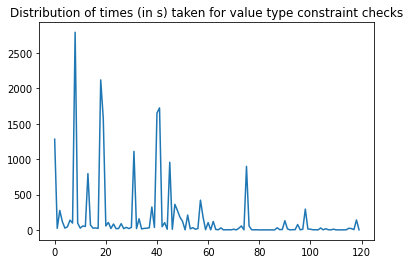

In [3]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for value type constraint checks")

## Item Requires Statement Constraint

### Understand Constraints File

In [18]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/itemRequiresConstraint/claims.type-constraints_all.tsv',sep='\t')

In [19]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [20]:
dfItemRequires['label'].unique()

array(['P2306', 'P2305', 'P2316', 'P2304', 'P2303', 'P6607', 'P4155',
       'P31', 'P2916', 'P4680', 'P2308'], dtype=object)

In [21]:
dfItemRequires['label'].value_counts()

P2306    7182
P2305    2540
P2316    2523
P2303     422
P2304      14
P6607      14
P2916       5
P4680       2
P4155       1
P2308       1
P31         1
Name: label, dtype: int64

In [22]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [23]:
dfItemRequires.head()

label                                  P2303 P2304   P2305   P2306 P2308  \
node1 id                                                                   
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN   NaN     NaN  [P214]   NaN   
P1010 P1010-P2302-Q21503247-56183614-0   NaN   NaN     NaN   [P31]   NaN   
      P1010-P2302-Q21503247-fd256eaf-0   NaN   NaN  [Q794]   [P17]   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN   NaN     NaN   [P31]   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN   NaN     NaN  [P214]   NaN   

label                                         P2316 P2916  P31 P4155 P4680  \
node1 id                                                                     
P1006 P1006-P2302-Q21503247-0451ef47-0          NaN   NaN  NaN   NaN   NaN   
P1010 P1010-P2302-Q21503247-56183614-0          NaN   NaN  NaN   NaN   NaN   
      P1010-P2302-Q21503247-fd256eaf-0  [Q21502408]   NaN  NaN   NaN   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0          NaN   NaN  NaN   NaN   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0          NaN   NaN  NaN   NaN   NaN   

label                                  P6607  
node1 id                                      
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN  
P1010 P1010-P2302-Q21503247-56183614-0   NaN  
      P1010-P2302-Q21503247-fd256eaf-0   NaN  
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN  
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN

In [24]:
dfItemRequires = dfItemRequires.droplevel(1)

In [25]:
dfItemRequires.head()

label P2303 P2304   P2305   P2306 P2308        P2316 P2916  P31 P4155 P4680  \
node1                                                                         
P1006   NaN   NaN     NaN  [P214]   NaN          NaN   NaN  NaN   NaN   NaN   
P1010   NaN   NaN     NaN   [P31]   NaN          NaN   NaN  NaN   NaN   NaN   
P1010   NaN   NaN  [Q794]   [P17]   NaN  [Q21502408]   NaN  NaN   NaN   NaN   
P1015   NaN   NaN     NaN   [P31]   NaN          NaN   NaN  NaN   NaN   NaN   
P1017   NaN   NaN     NaN  [P214]   NaN          NaN   NaN  NaN   NaN   NaN   

label P6607  
node1        
P1006   NaN  
P1010   NaN  
P1010   NaN  
P1015   NaN  
P1017   NaN

However, there is one anomaly where the property does not have a co-dependency constraint associated with it, but still has a link to this constraint.

In [26]:
dfItemRequires[dfItemRequires['P4680'].apply(lambda p: type(p) == list)]

label P2303 P2304        P2305    P2306 P2308 P2316 P2916  P31 P4155  \
node1                                                                  
P5447   NaN   NaN  [Q55426051]  [P5446]   NaN   NaN   NaN  NaN   NaN   
P5448   NaN   NaN  [Q55426051]  [P5446]   NaN   NaN   NaN  NaN   NaN   

label        P4680 P6607  
node1                     
P5447  [Q46466783]   NaN  
P5448  [Q46466783]   NaN

In [27]:
dfItemRequires[dfItemRequires['P2305'].apply(lambda p: type(p) == list)]

label              P2303 P2304                             P2305   P2306  \
node1                                                                      
P1010                NaN   NaN                            [Q794]   [P17]   
P1045                NaN   NaN  [Q20808382, Q28218485, Q3044918]   [P39]   
P1045                NaN   NaN                          [Q82955]  [P106]   
P1045                NaN   NaN                              [Q5]   [P31]   
P1045                NaN   NaN                    [Q142, Q71084]   [P27]   
...                  ...   ...                               ...     ...   
P980                 NaN   NaN                             [Q34]   [P17]   
P981                 NaN   NaN                             [Q55]   [P17]   
P981                 NaN   NaN                        [Q1852859]   [P31]   
P988                 NaN   NaN                            [Q928]   [P17]   
P990   [Q49678, Q853715]   NaN                              [Q5]   [P31]   

label P2308        P2316 P2916  P31 P4155 P4680 P6607  
node1                                                  
P1010   NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P1045   NaN          NaN   NaN  NaN   NaN   NaN   NaN  
P1045   NaN          NaN   NaN  NaN   NaN   NaN   NaN  
P1045   NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P1045   NaN          NaN   NaN  NaN   NaN   NaN   NaN  
...     ...          ...   ...  ...   ...   ...   ...  
P980    NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P981    NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P981    NaN          NaN   NaN  NaN   NaN   NaN   NaN  
P988    NaN  [Q21502408]   NaN  NaN   NaN   NaN   NaN  
P990    NaN          NaN   NaN  NaN   NaN   NaN   NaN  

[2540 rows x 11 columns]

### Query Generator

#### Version 1 - Mandatory + Suggestion + Normal

In [55]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final2'
subFolderName = "Mand_Sugg_Normal"
shellFileSuffix = 'codepConst_MSN_Validator_xverify'
graph_cache_file_prefix = "codep_new3_001_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + suggestion + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P3350.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P5128.tsv does not exist
File: ../../propertiesSplit/claims.P1627.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.ts

In [56]:
cnt

527

In [57]:
fCnt

27

In [123]:
# from tqdm.notebook import tqdm
# import os.path
# import os
# folderName = 'codependencyConstraint'
# for prop in tqdm(dfItemRequires.index.unique()):
#     for subFolderName in ['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal']:
#         if os.path.isfile("../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv") and \
#             os.path.isfile("../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv"):
#                 os.system("kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
#                     ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
#                     -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_w_exceptions.tsv")

In [64]:
# import os
# for i in range(1,28):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_MSN_Validator_xverify"+str(i)+".sh")

#### Version 2 - Mandatory + Normal

In [50]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final2'
subFolderName = "Mand_Normal"
shellFileSuffix = 'codepConst_MN_Validator_xverify'
graph_cache_file_prefix = "codep_new3_03_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P1627.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.tsv does not exist
File: ../../propertiesSplit/claims.P715.tsv does not exist
File: ../../propertiesSplit/claims.P2606.tsv does not exist
File: ../../propertiesSplit/claims.P8303.tsv

In [51]:
cnt

468

In [52]:
# import os
# for i in range(1,25):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_MN_Validator_xverify"+str(i)+".sh")

#### Version 3 - Mandatory

In [60]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final2'
subFolderName = "Mand"
shellFileSuffix = 'codepConst_M_Validator_xverify'
graph_cache_file_prefix = "codep_new3_03_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P1627.tsv does not exist


In [61]:
cnt

78

In [65]:
# import os
# for i in range(1,5):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_M_Validator_xverify"+str(i)+".sh")

#### Version 4 - Normal

In [62]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final2'
subFolderName = "Normal"
shellFileSuffix = 'codepConst_N_Validator_xverify'
graph_cache_file_prefix = "codep_new3_04_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.tsv does not exist
File: ../../propertiesSplit/claims.P715.tsv does not exist
File: ../../propertiesSplit/claims.P2606.tsv does not exist
File: ../../propertiesSplit/claims.P8303.tsv does not exist
File: ../../propertiesSplit/claims.P1874.tsv

In [63]:
cnt

418

In [2]:
# import os
# for i in range(1,23):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_N_Validator_xverify"+str(i)+".sh")

#### Version 5 - Suggestion

In [29]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final2'
subFolderName = "Suggestion"
shellFileSuffix = 'codepConst_S_Validator_xverify_2_'
graph_cache_file_prefix = "codep_new3_08_"
fOP = None

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = suggestion
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P3350.tsv does not exist
File: ../../propertiesSplit/claims.P5128.tsv does not exist


In [30]:
cnt

97

In [31]:
# import os
# for i in range(1,6):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_S_Validator_xverify_2_"+str(i)+".sh")

### Merge all correct/incorrect outputs

In [17]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [15]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint_Final/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [ ]:
# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint/" + folder + "/"
#     folderPathNew = "../../allConstraintsAnalysis/codependencyConstraint_Final/" + folder + "/"
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.correctSuperSet.tsv --filter-on {folderPath}claims.all.correctSuperSet.tsv -o {folderPathNew}claims.all.correctSuperSet.diff.tsv")
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.incorrectSuperSet.tsv --filter-on {folderPath}claims.all.incorrectSuperSet.tsv -o {folderPathNew}claims.all.incorrectSuperSet.diff.tsv")
    

### Analyze Violations

In [2]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

codepConstViolations = {}
codepConstPropList = set()

# codepConstViolationsSummary = {}

for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal', 'Suggestion'])):
    filePath = "../../allConstraintsAnalysis/codependencyConstraint_Final2/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        codepConstPropList.add(prop)
        count1 = countLines(filePath+filename)
        if folder not in codepConstViolations:
            codepConstViolations[folder] = {}
        if prop not in codepConstViolations[folder]:
            codepConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        codepConstViolations[folder][prop][correctness] = count1
        codepConstViolations[folder][prop]['paths'].append(filePath+filename)
        
#         if folder not in codepConstViolationsSummary:
#             codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
#         codepConstViolationsSummary[folder][correctness] += count1

0it [00:00, ?it/s]

  0%|          | 0/1192 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/953 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

In [3]:
codepConstViolationsSummary = {}
for folder in codepConstViolations.keys():
    for prop in codepConstViolations[folder].keys():
        if folder not in codepConstViolationsSummary:
            codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0, 'propCount': 0}
        codepConstViolationsSummary[folder]['correct'] += codepConstViolations[folder][prop]['correct']
        codepConstViolationsSummary[folder]['incorrect'] += codepConstViolations[folder][prop]['incorrect']
        codepConstViolationsSummary[folder]['propCount'] += 1

In [4]:
for elem in codepConstViolationsSummary.keys():
    codepConstViolationsSummary[elem]['total'] = codepConstViolationsSummary[elem]['correct'] + codepConstViolationsSummary[elem]['incorrect']
    codepConstViolationsSummary[elem]['percIncorrect'] = codepConstViolationsSummary[elem]['incorrect'] / codepConstViolationsSummary[elem]['total'] * 100

In [5]:
codepConstViolationsSummary

{'Mand_Sugg_Normal': {'correct': 298173993,
  'incorrect': 4433743,
  'propCount': 527,
  'total': 302607736,
  'percIncorrect': 1.4651783389965947},
 'Mand_Normal': {'correct': 273602683,
  'incorrect': 2229992,
  'propCount': 468,
  'total': 275832675,
  'percIncorrect': 0.8084582437523038},
 'Mand': {'correct': 3984740,
  'incorrect': 717,
  'propCount': 78,
  'total': 3985457,
  'percIncorrect': 0.01799040862816987},
 'Normal': {'correct': 272710532,
  'incorrect': 2229328,
  'propCount': 418,
  'total': 274939860,
  'percIncorrect': 0.8108420510580022},
 'Suggestion': {'correct': 25729758,
  'incorrect': 2224050,
  'propCount': 97,
  'total': 27953808,
  'percIncorrect': 7.95616110692325}}

In [41]:
mandatoryPropCount = 0
suggestionPropCount = 0
normalPropCount = 0
for prop in tqdm(dfItemRequires.index.unique()):
    if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
        continue
    prop = str(prop)
    hasMandatory = False
    hasSuggestion = False
    hasNormal = False

    for _, constraint in dfItemRequires.loc[[prop]].iterrows():
        prop2 = constraint['P2306']
            
        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
            continue
            
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                hasMandatory = True
            elif constraint['P2316'][0] == 'Q62026391':
                hasSuggestion = True
        else:
            hasNormal = True
    if hasMandatory:
        mandatoryPropCount += 1
    if hasSuggestion:
        suggestionPropCount += 1
    if hasNormal:
        normalPropCount += 1

NameError: name 'dfItemRequires' is not defined

In [ ]:
print(f"No. of props having at least 1 mandatory constraint: {mandatoryPropCount}")
print(f"No. of props having at least 1 suggestion constraint: {suggestionPropCount}")
print(f"No. of props having at least 1 normal constraint: {normalPropCount}")

#### Version 1 - Mand Sugg Normal

In [ ]:
import pandas as pd
codepConstDF1 = pd.DataFrame(codepConstViolations['Mand_Sugg_Normal']).T

In [ ]:
codepConstDF1

In [ ]:
codepConstDF1['violation_ratio'] = codepConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [ ]:
codepConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
list(codepConstDF1.loc['P2302']['paths'])

In [ ]:
!head ../../allConstraintsAnalysis/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv

In [ ]:
codepConstDF1.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF1['violation_ratio'].describe()

In [ ]:
codepConstDF1['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios")

In [ ]:
codepConstDF1[codepConstDF1['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF1['violation_ratio'] >= 3.539484)}/{len(codepConstDF1)}")

#### Version 2 - Mand Normal

In [ ]:
import pandas as pd
codepConstDF2 = pd.DataFrame(codepConstViolations['Mand_Normal']).T

In [ ]:
codepConstDF2

In [ ]:
codepConstDF2['violation_ratio'] = codepConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [ ]:
codepConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
codepConstDF2.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF2['violation_ratio'].describe()

In [ ]:
codepConstDF2['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios")

In [ ]:
codepConstDF2[codepConstDF2['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF2['violation_ratio'] >= 2.290915)}/{len(codepConstDF2)}")

#### Version 3 - Mand

In [ ]:
import pandas as pd
codepConstDF3 = pd.DataFrame(codepConstViolations['Mand']).T

In [ ]:
codepConstDF3

In [ ]:
codepConstDF3['violation_ratio'] = codepConstDF3.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [ ]:
codepConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
codepConstDF3.loc['P1713']

In [ ]:
!head ../../allConstraintsAnalysis/codependencyConstraint_Final/Mand/claims.P1713.incorrect.tsv

In [ ]:
!cat ../../allConstraintsAnalysis/codependencyConstraint/Mand/claims.P1713.incorrect.tsv

In [ ]:
codepConstDF3.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF3['violation_ratio'].describe()

In [ ]:
codepConstDF3['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios")

In [ ]:
codepConstDF3[codepConstDF3['violation_ratio'] <= 0.0005].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF3['violation_ratio'] >= 0.922928)}/{len(codepConstDF3)}")

#### Version 4 - Normal

In [ ]:
import pandas as pd
codepConstDF4 = pd.DataFrame(codepConstViolations['Normal']).T

In [ ]:
codepConstDF4

In [ ]:
codepConstDF4['violation_ratio'] = codepConstDF4.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [ ]:
codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(15)

In [ ]:
# list(codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(5).paths)

In [ ]:
codepConstDF4.sort_values(by=['incorrect'],ascending=False).head(15)

In [ ]:
codepConstDF4['violation_ratio'].describe()

In [ ]:
codepConstDF4['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios")

In [ ]:
codepConstDF4[codepConstDF4['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5")

In [ ]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF4['violation_ratio'] >= 2.414703)}/{len(codepConstDF4)}")

### Find out time required

In [ ]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
timesVersion = {"MSN": [], "MN": [], "M": [], "N": []}
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("timeLog_codepConst_"):
        ver = filename.split('_')[2]
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes
        timesVersion[ver] += tempTimes
print(pd.Series(times).describe())

In [15]:
print(pd.Series(timesVersion['MSN']).describe())

count     527.000000
mean       98.258875
std       141.306645
min         1.666000
25%        38.343000
50%        55.184000
75%       100.430500
max      1842.243000
dtype: float64


In [ ]:
print(pd.Series(timesVersion['MN']).describe())

In [ ]:
print(pd.Series(timesVersion['M']).describe())

In [ ]:
print(pd.Series(timesVersion['N']).describe())

## Symmetric Constraint (Q21510862)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [19]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510862)" \
    -o ../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-09 10:39:46 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510862']
---------------------------------------------
[2021-04-09 10:39:46 sqlstore]: CREATE INDEX on table graph_1 column node2 ...
[2021-04-09 10:39:46 sqlstore]: ANALYZE INDEX on table graph_1 column node2 ...
[2021-04-09 10:39:46 sqlstore]: CREATE INDEX on table graph_1 column label ...
[2021-04-09 10:39:47 sqlstore]: ANALYZE INDEX on table graph_1 column label ...


In [20]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv",sep='\t')

In [21]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [22]:
constDF2.to_csv("../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [64]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv',sep='\t')

In [65]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [66]:
dfItemRequires['label'].unique()

array(['P2316', 'P2303'], dtype=object)

In [67]:
dfItemRequires['label'].value_counts()

P2316    42
P2303     3
Name: label, dtype: int64

In [68]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [80]:
dfItemRequires.loc['P2673']

KeyError: 'P2673'

In [74]:
dfItemRequires.head()

label                                  P2303        P2316
node1 id                                                 
P1322 P1322-P2302-Q21510862-85dea891-0   NaN     [Normal]
P1327 P1327-P2302-Q21510862-a3c3a094-0   NaN     [Normal]
P1382 P1382-P2302-Q21510862-f6bcfecf-0   NaN     [Normal]
P1560 P1560-P2302-Q21510862-fabecaeb-0   NaN  [Q21502408]
P1639 P1639-P2302-Q21510862-384edcd4-0   NaN  [Q21502408]

In [75]:
dfItemRequires = dfItemRequires.droplevel(1)

In [76]:
dfItemRequires.head()

label P2303        P2316
node1                   
P1322   NaN     [Normal]
P1327   NaN     [Normal]
P1382   NaN     [Normal]
P1560   NaN  [Q21502408]
P1639   NaN  [Q21502408]

### Query Generator

In [77]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'symmetricConstraint_Final4'
shellFileSuffix = 'symmConst_Validator_xverify_new123'
graph_cache_prefix = 'symm_06'

for row in tqdm(dfItemRequires.iterrows()):
#     try:
        prop = row[0]
        constraint = row[1]
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                sfname = 'mandatory'
            elif constraint['P2316'][0] == 'Q62026391':
                sfname = 'suggestion'
            elif constraint['P2316'][0] == 'Normal':
                sfname = 'normal'
        else:
            sfname = 'normal'
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        command = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
                    ../../propertiesSplit/claims."+ prop +".copy2.tsv \
                    --match 'tsv: (node1)-[nodeProp]->(node2), copy2: (node2)-[]->(node1)' "
        
        os.system("cp ../../propertiesSplit/claims."+ prop +".tsv ../../propertiesSplit/claims."+ prop +".copy2.tsv")
        
        if cnt % 20 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        command
        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = constraint['P2303']
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

0it [00:00, ?it/s]

In [79]:
cnt

38

In [78]:
# import os
# for i in range(1,7):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/symmConst_Validator_xverify_new123"+str(i)+".sh")

### Analyze Violations

In [81]:
import pandas as pd
import os
from tqdm.notebook import tqdm

symmConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

symmConstViolations = {}
symmConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysis/symmetricConstraint_Final4/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        symmConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in symmConstViolations:
            symmConstViolations[folder] = {}
        if prop not in symmConstViolations[folder]:
            symmConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        symmConstViolations[folder][prop][correctness] = count1
        symmConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [82]:
len(symmConstPropList)

36

In [83]:
symmConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    symmConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in symmConstViolations[folder].keys():
        symmConstViolationsSummary[folder]['correct'] += symmConstViolations[folder][prop]['correct']
        symmConstViolationsSummary[folder]['incorrect'] += symmConstViolations[folder][prop]['incorrect']
    symmConstViolationsSummary[folder]['total'] = symmConstViolationsSummary[folder]['correct'] + symmConstViolationsSummary[folder]['incorrect']
    symmConstViolationsSummary[folder]['percIncorrect'] = symmConstViolationsSummary[folder]['incorrect'] / symmConstViolationsSummary[folder]['total'] * 100
    symmConstViolationsSummary[folder]['propCount'] = len(symmConstViolations[folder].keys())

0it [00:00, ?it/s]

In [84]:
symmConstViolationsSummary

{'mandatory': {'correct': 7439,
  'incorrect': 34,
  'total': 7473,
  'percIncorrect': 0.454971229760471,
  'propCount': 5},
 'normal': {'correct': 6239704,
  'incorrect': 47959,
  'total': 6287663,
  'percIncorrect': 0.7627476218111562,
  'propCount': 28},
 'suggestion': {'correct': 782869,
  'incorrect': 31595,
  'total': 814464,
  'percIncorrect': 3.879238370265598,
  'propCount': 3}}

In [57]:
noOfStmts = 0
for fold in symmConstViolationsSummary.keys():
    noOfStmts += symmConstViolationsSummary[fold]['total']
noOfStmts

12350821

In [58]:
symmConstDF1 = pd.DataFrame(symmConstViolations['mandatory']).T
symmConstDF1['violation_ratio'] = symmConstDF1.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P450        0      1775  [../../allConstraintsAnalysis/symmetricConstra...   
P4147       0       280  [../../allConstraintsAnalysis/symmetricConstra...   
P4149       0       276  [../../allConstraintsAnalysis/symmetricConstra...   
P2673       4       883  [../../allConstraintsAnalysis/symmetricConstra...   
P2152      75         1  [../../allConstraintsAnalysis/symmetricConstra...   
P1639    2059        20  [../../allConstraintsAnalysis/symmetricConstra...   
P1560    3239        13  [../../allConstraintsAnalysis/symmetricConstra...   
P6185     280         0  [../../allConstraintsAnalysis/symmetricConstra...   
P3364    1786         0  [../../allConstraintsAnalysis/symmetricConstra...   

       violation_ratio  
P450          1.000000  
P4147         1.000000  
P4149         1.000000  
P2673         0.995490  
P2152         0.013158  
P1639         0.009620  
P1560         0.003998  
P6185         0.000000  
P3364         0.000000

In [59]:
symmConstDF2 = pd.DataFrame(symmConstViolations['suggestion']).T
symmConstDF2['violation_ratio'] = symmConstDF2.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P629       72     72256  [../../allConstraintsAnalysis/symmetricConstra...   
P2789  103892      6058  [../../allConstraintsAnalysis/symmetricConstra...   
P1889  505954     23764  [../../allConstraintsAnalysis/symmetricConstra...   
P197   173023      1773  [../../allConstraintsAnalysis/symmetricConstra...   

       violation_ratio  
P629          0.999005  
P2789         0.055098  
P1889         0.044862  
P197          0.010143

In [60]:
symmConstDF3 = pd.DataFrame(symmConstViolations['normal']).T
symmConstDF3['violation_ratio'] = symmConstDF3.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P5206       0        24  [../../allConstraintsAnalysis/symmetricConstra...   
P3448       0      4849  [../../allConstraintsAnalysis/symmetricConstra...   
P8596       0         3  [../../allConstraintsAnalysis/symmetricConstra...   
P5131       0        96  [../../allConstraintsAnalysis/symmetricConstra...   
P5996       0        82  [../../allConstraintsAnalysis/symmetricConstra...   
P2376       0        20  [../../allConstraintsAnalysis/symmetricConstra...   
P8625       0        24  [../../allConstraintsAnalysis/symmetricConstra...   
P5132       0       170  [../../allConstraintsAnalysis/symmetricConstra...   
P634        0       357  [../../allConstraintsAnalysis/symmetricConstra...   
P8744       0      1244  [../../allConstraintsAnalysis/symmetricConstra...   
P3709       0       262  [../../allConstraintsAnalysis/symmetricConstra...   
P5134       0        25  [../../allConstraintsAnalysis/symmetricConstra...   
P2499       0      6197  [../../allConstraintsAnalysis/symmetricConstra...   
P3713       0       338  [../../allConstraintsAnalysis/symmetricConstra...   
P3816       0        24  [../../allConstraintsAnalysis/symmetricConstra...   

       violation_ratio  
P5206              1.0  
P3448              1.0  
P8596              1.0  
P5131              1.0  
P5996              1.0  
P2376              1.0  
P8625              1.0  
P5132              1.0  
P634               1.0  
P8744              1.0  
P3709              1.0  
P5134              1.0  
P2499              1.0  
P3713              1.0  
P3816              1.0

In [61]:
# !head ../../allConstraintsAnalysis/symmetricConstraint/normal/claims.P3032.incorrect.tsv



Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

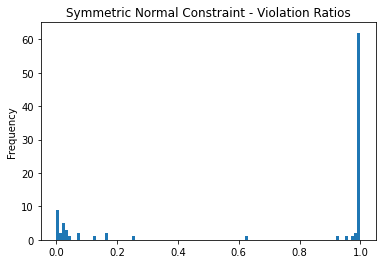

In [62]:
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

### Find out time required

In [11]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("symmConst_Validator_"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/108 [00:00<?, ?it/s]

In [12]:
print(pd.Series(times).describe())

count     38.000000
mean      15.315868
std       61.526228
min        2.069000
25%        2.617750
50%        3.003000
75%        5.889250
max      383.135000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

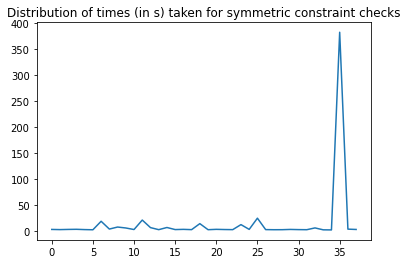

In [13]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

## Inverse Constraint (Q21510855)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [21]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510855)" \
    -o ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-03-28 12:37:57 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510855']
---------------------------------------------


In [21]:
!head ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv

id	node1	label	node2	rank	node2;wikidatatype
P1026-P2302-Q21510855-adc83b86-0	P1026	P2302	Q21510855	normal	wikibase-item
P1029-P2302-Q21510855-6b55e057-0	P1029	P2302	Q21510855	normal	wikibase-item
P115-P2302-Q21510855-f7aa0b78-0	P115	P2302	Q21510855	normal	wikibase-item
P1151-P2302-Q21510855-0d9aa9c6-0	P1151	P2302	Q21510855	normal	wikibase-item
P1204-P2302-Q21510855-e3d53bb6-0	P1204	P2302	Q21510855	normal	wikibase-item
P1283-P2302-Q21510855-0e7699bb-0	P1283	P2302	Q21510855	normal	wikibase-item
P1308-P2302-Q21510855-2aba96b7-0	P1308	P2302	Q21510855	normal	wikibase-item
P1365-P2302-Q21510855-c809b758-0	P1365	P2302	Q21510855	normal	wikibase-item
P1366-P2302-Q21510855-eee12ef8-0	P1366	P2302	Q21510855	normal	wikibase-item


In [3]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/inverseConstraint/claims.constraints_list.tsv",sep='\t')

In [4]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [5]:
constDF2.to_csv("../../constraintsOP/inverseConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [1]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/inverseConstraint/claims.constraints_all.tsv',sep='\t')

In [2]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [3]:
dfItemRequires['label'].unique()

array(['P2306', 'P2316', 'P4155', 'P2303'], dtype=object)

In [4]:
dfItemRequires['label'].value_counts()

P2306    110
P2316     10
P2303      2
P4155      1
Name: label, dtype: int64

In [5]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [6]:
dfItemRequires.head()

label                                  P2303    P2306        P2316 P4155
node1 id                                                                
P1026 P1026-P2302-Q21510855-adc83b86-0   NaN    [P50]          NaN   NaN
P1029 P1029-P2302-Q21510855-6b55e057-0   NaN  [P5096]          NaN   NaN
P115  P115-P2302-Q21510855-f7aa0b78-0    NaN   [P466]          NaN   NaN
P1151 P1151-P2302-Q21510855-0d9aa9c6-0   NaN  [P1204]  [Q21502408]   NaN
P1204 P1204-P2302-Q21510855-e3d53bb6-0   NaN  [P1151]          NaN   NaN

In [7]:
dfItemRequires = dfItemRequires.droplevel(1)

In [8]:
dfItemRequires.head()

label P2303    P2306        P2316 P4155
node1                                  
P1026   NaN    [P50]          NaN   NaN
P1029   NaN  [P5096]          NaN   NaN
P115    NaN   [P466]          NaN   NaN
P1151   NaN  [P1204]  [Q21502408]   NaN
P1204   NaN  [P1151]          NaN   NaN

### Query Generator

In [11]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0
fOP = None

folderName = 'inverseConstraint_Final3'
shellFileSuffix = 'invConst_Validator_xverify2_'
graph_cache_file_prefix = "inv_2_"

for prop, constraint in tqdm(dfItemRequires.iterrows()):
#     try:
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                subFolderName = "mandatory"
            elif constraint['P2316'][0] == 'Q62026391':
                subFolderName = "suggestion"
        else:
            subFolderName = "normal"
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
            
        prop2 = constraint['P2306']

        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
            continue
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
            
        command = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
                        ../../propertiesSplit/claims."+ prop2 +".tsv \
                        --match '"+ \
                        f"{prop}: (node1)-[nodeProp]->(node2), {prop2}: (node2)-[]->(node1)' "

        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = set(constraint['P2303'])
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
#             print(command)        
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt; \n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

0it [00:00, ?it/s]

In [12]:
cnt

110

In [13]:
# import os
# for i in range(1,7):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/invConst_Validator_xverify2_"+str(i)+".sh")

### Analyze Violations

In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm

symmConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

symmConstViolations = {}
symmConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysis/inverseConstraint_Final3/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        symmConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in symmConstViolations:
            symmConstViolations[folder] = {}
        if prop not in symmConstViolations[folder]:
            symmConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        symmConstViolations[folder][prop][correctness] = count1
        symmConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [2]:
len(symmConstPropList)

110

In [3]:
symmConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    symmConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in symmConstViolations[folder].keys():
        symmConstViolationsSummary[folder]['correct'] += symmConstViolations[folder][prop]['correct']
        symmConstViolationsSummary[folder]['incorrect'] += symmConstViolations[folder][prop]['incorrect']
    symmConstViolationsSummary[folder]['total'] = symmConstViolationsSummary[folder]['correct'] + symmConstViolationsSummary[folder]['incorrect']
    symmConstViolationsSummary[folder]['percIncorrect'] = symmConstViolationsSummary[folder]['incorrect'] / symmConstViolationsSummary[folder]['total'] * 100
    symmConstViolationsSummary[folder]['propCount'] = len(symmConstViolations[folder].keys())

0it [00:00, ?it/s]

In [4]:
symmConstViolationsSummary

{'mandatory': {'correct': 6564,
  'incorrect': 127,
  'total': 6691,
  'percIncorrect': 1.8980720370647137,
  'propCount': 6},
 'normal': {'correct': 7131934,
  'incorrect': 179444,
  'total': 7311378,
  'percIncorrect': 2.4543116222413888,
  'propCount': 100},
 'suggestion': {'correct': 2002102,
  'incorrect': 93735,
  'total': 2095837,
  'percIncorrect': 4.4724375034890596,
  'propCount': 4}}

In [15]:
noOfStmts = 0
for fold in symmConstViolationsSummary.keys():
    noOfStmts += symmConstViolationsSummary[fold]['total']
noOfStmts

9413906

In [16]:
symmConstDF1 = pd.DataFrame(symmConstViolations['mandatory']).T
symmConstDF1['violation_ratio'] = symmConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
symmConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P2673     819        68  [../../allConstraintsAnalysis/inverseConstrain...   
P4147     271         9  [../../allConstraintsAnalysis/inverseConstrain...   
P4149     272         4  [../../allConstraintsAnalysis/inverseConstrain...   
P2033    1836        26  [../../allConstraintsAnalysis/inverseConstrain...   
P450     1754        16  [../../allConstraintsAnalysis/inverseConstrain...   
P1151    1612         4  [../../allConstraintsAnalysis/inverseConstrain...   

       violation_ratio  
P2673         0.076663  
P4147         0.032143  
P4149         0.014493  
P2033         0.013963  
P450          0.009040  
P1151         0.002475

In [17]:
symmConstDF2 = pd.DataFrame(symmConstViolations['suggestion']).T
symmConstDF2['violation_ratio'] = symmConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
symmConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P1434    3512      4723  [../../allConstraintsAnalysis/inverseConstrain...   
P155   963205     48956  [../../allConstraintsAnalysis/inverseConstrain...   
P156   963183     39925  [../../allConstraintsAnalysis/inverseConstrain...   
P629    72202       131  [../../allConstraintsAnalysis/inverseConstrain...   

       violation_ratio  
P1434         0.573528  
P155          0.048368  
P156          0.039801  
P629          0.001811

In [18]:
symmConstDF3 = pd.DataFrame(symmConstViolations['normal']).T
symmConstDF3['violation_ratio'] = symmConstDF3.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

correct incorrect                                              paths  \
P1605      12       188  [../../allConstraintsAnalysis/inverseConstrain...   
P3448     583      4249  [../../allConstraintsAnalysis/inverseConstrain...   
P926        1         5  [../../allConstraintsAnalysis/inverseConstrain...   
P925        1         5  [../../allConstraintsAnalysis/inverseConstrain...   
P1029     475      2037  [../../allConstraintsAnalysis/inverseConstrain...   
P115     6712     24290  [../../allConstraintsAnalysis/inverseConstrain...   
P8625       7        17  [../../allConstraintsAnalysis/inverseConstrain...   
P5132      81        89  [../../allConstraintsAnalysis/inverseConstrain...   
P425     2512      1956  [../../allConstraintsAnalysis/inverseConstrain...   
P3816      14        10  [../../allConstraintsAnalysis/inverseConstrain...   
P1677       6         4  [../../allConstraintsAnalysis/inverseConstrain...   
P2512     210       140  [../../allConstraintsAnalysis/inverseConstrain...   
P2578     989       527  [../../allConstraintsAnalysis/inverseConstrain...   
P3261     232       122  [../../allConstraintsAnalysis/inverseConstrain...   
P568     1049       445  [../../allConstraintsAnalysis/inverseConstrain...   

       violation_ratio  
P1605         0.940000  
P3448         0.879346  
P926          0.833333  
P925          0.833333  
P1029         0.810908  
P115          0.783498  
P8625         0.708333  
P5132         0.523529  
P425          0.437780  
P3816         0.416667  
P1677         0.400000  
P2512         0.400000  
P2578         0.347625  
P3261         0.344633  
P568          0.297858

In [19]:
!head ../../allConstraintsAnalysis/inverseConstraint/normal/claims.P925.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q1133903-P925-Q18707-eae3a579-0	Q1133903	P925	Q18707	normal	wikibase-item
Q1570272-P925-Q7135001-5dbdce8c-0	Q1570272	P925	Q7135001	normal	wikibase-item
Q301613-P925-Q7135001-528c29b2-0	Q301613	P925	Q7135001	normal	wikibase-item
Q452595-P925-Q864951-c5b34e11-0	Q452595	P925	Q864951	normal	wikibase-item
Q5064084-P925-Q4117017-76545a06-0	Q5064084	P925	Q4117017	normal	wikibase-item


Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

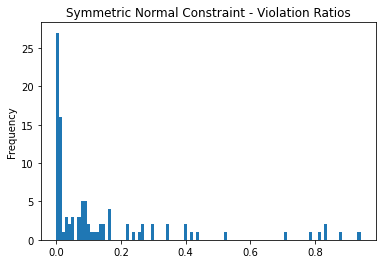

In [20]:
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

### Find out time required

In [55]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("invConst_Validator_new3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [56]:
print(pd.Series(times).describe())

count    110.000000
mean       7.526318
std       11.686634
min        1.519000
25%        2.624000
50%        3.298500
75%        6.463250
max       80.846000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

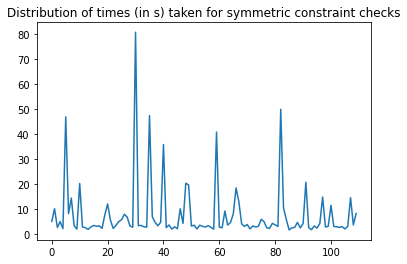

In [57]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

# Analysis on properties with constraints

In [26]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->()" \
    -o ../../constraintsOP/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-03 09:14:12 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
  PARAS: ['P2302']
---------------------------------------------


In [39]:
!kgtk unique -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz --column node1 -o ../../constraintsOP/claims.propList.tsv

In [42]:
!head ../../constraintsOP/claims.propList.tsv

node1	label	node2
P10	count	17
P1000	count	10
P1001	count	26
P1002	count	9
P1003	count	20
P1004	count	33
P1005	count	21
P1006	count	26
P1007	count	19


In [43]:
import pandas as pd
import os
props = pd.read_csv("../../constraintsOP/claims.constraints_list.tsv", sep='\t')

In [44]:
props2 = props.groupby(['node1']).node2.apply(list)

In [45]:
len(props2)

8100

In [48]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2336, 8100)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object

In [32]:
import pandas as pd
import os
props2 = pd.read_csv("../../constraintsOP/claims.propList.tsv", sep='\t')

In [33]:
props2 = props2.groupby(['node1']).node2.apply(list)

In [34]:
len(props2)

8193

In [35]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2415, 8193)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object